In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt



In [2]:

import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import sklearn.preprocessing as pre
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.tree import DecisionTreeClassifier 


In [4]:
df_nonpop = pd.read_csv('C:/Users/VSmart/Projects/NonPopularVids.csv')
df_pop = pd.read_csv('C:/Users/VSmart/Projects/PopVids.csv')


In [5]:
sample=pd.concat([df_pop,df_nonpop])

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1134
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1395 non-null   int64  
 1   video_id              1395 non-null   object 
 2   definition            1395 non-null   int64  
 3   categoryID            1395 non-null   int64  
 4   likes_to_views        1395 non-null   float64
 5   duration_to_views     1395 non-null   float64
 6   captioning            1395 non-null   int64  
 7   dislikes_to_views     1395 non-null   float64
 8   title_length          1395 non-null   int64  
 9   subscriber_count      1395 non-null   int64  
 10  descrp_length         1395 non-null   int64  
 11  publish_month         1395 non-null   int64  
 12  numVides_on_Channel   1395 non-null   int64  
 13  popularity            1395 non-null   int64  
 14  likes_to_dislikes     1395 non-null   float64
 15  views_to_subscribers 

In [7]:
def createROCCurve(y_test,y_pred,heading):      #plots ROC Curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_pred = label_binarize(y_pred,classes=[0,1])
    y_test = label_binarize(y_test,classes=[0,1])
    n_classes = y_test.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(heading)
    plt.legend(loc="lower right")
    plt.show()

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [9]:
NB_Model = MultinomialNB()
RFC_Model = RandomForestClassifier()
KNC_Model = KNeighborsClassifier()
DTC_Model = DecisionTreeClassifier()

In [10]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1134
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1395 non-null   int64  
 1   video_id              1395 non-null   object 
 2   definition            1395 non-null   int64  
 3   categoryID            1395 non-null   int64  
 4   likes_to_views        1395 non-null   float64
 5   duration_to_views     1395 non-null   float64
 6   captioning            1395 non-null   int64  
 7   dislikes_to_views     1395 non-null   float64
 8   title_length          1395 non-null   int64  
 9   subscriber_count      1395 non-null   int64  
 10  descrp_length         1395 non-null   int64  
 11  publish_month         1395 non-null   int64  
 12  numVides_on_Channel   1395 non-null   int64  
 13  popularity            1395 non-null   int64  
 14  likes_to_dislikes     1395 non-null   float64
 15  views_to_subscribers 

In [11]:
X=sample.drop(['Unnamed: 0','definition','popularity','video_id','captioning'],axis=1)
Y=sample['popularity']

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size = .25)

# Implementation of Naive Bayes


Accuracy 95.70200573065902 

Classfication Report
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       286
           1       0.84      0.94      0.89        63

    accuracy                           0.96       349
   macro avg       0.91      0.95      0.93       349
weighted avg       0.96      0.96      0.96       349



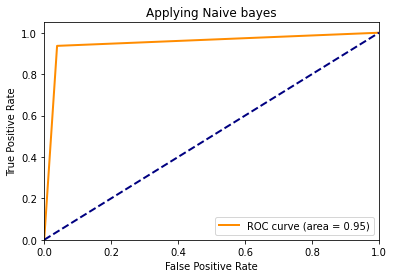

confusion matrix value for Naive bayes is
True Negative: 275 False Negative: 4 True Positive: 59 False Positive: 11
--------------Accuracy----------------
Accuracy of Naive bayes  is 95.7
--------------Sensitivity----------------
Sensitivity of Naive bayes  is 93.65
--------------Specificity----------------
Specificity of Naive bayes  is 96.15


In [13]:

nv =MultinomialNB()
nv.fit(X_train,y_train)

y_pred = nv.predict(X_test)
#Confusion matrix is used to calculate the accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy=((confusion_matrix[0][0]+confusion_matrix[1][1])/len(y_test)*100)
print('\nAccuracy',accuracy,'\n')
print('Classfication Report\n',classification_report(y_test, y_pred))

createROCCurve(y_test,y_pred,'Applying Naive bayes')


conf_Mat= confusion_matrix
TN = conf_Mat[0][0]
FN = conf_Mat[1][0]
TP = conf_Mat[1][1]
FP = conf_Mat[0][1]

name="Naive bayes"
    
print("confusion matrix value for", name,"is")
print("True Negative:",TN,"False Negative:",FN,"True Positive:",TP,"False Positive:",FP)
Accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    
print("--------------Accuracy----------------")
print("Accuracy of", name, " is",round(Accuracy,2))

Sensitivity=TP/(TP+FN)*100
print("--------------Sensitivity----------------")
print("Sensitivity of", name ," is" ,round(Sensitivity,2))

Specificity=TN/(TN+FP)*100
print("--------------Specificity----------------")
print("Specificity of",name," is",round(Specificity,2))

# Implementation of SVM


Accuracy 81.9484240687679 

Classfication Report
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       286
           1       0.00      0.00      0.00        63

    accuracy                           0.82       349
   macro avg       0.41      0.50      0.45       349
weighted avg       0.67      0.82      0.74       349



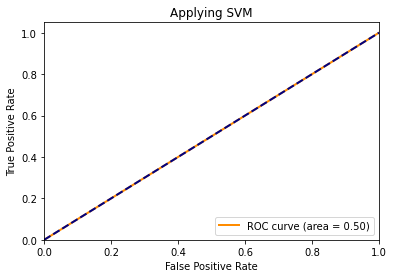

confusion matrix value for s_v_m is
True Negative: 286 False Negative: 63 True Positive: 0 False Positive: 0
--------------Accuracy----------------
Accuracy of s_v_m  is 81.95
--------------Sensitivity----------------
Sensitivity of s_v_m  is 0.0
--------------Specificity----------------
Specificity of s_v_m  is 100.0


In [14]:

s_v_m =svm.SVC()
s_v_m.fit(X_train,y_train)

y_pred = s_v_m.predict(X_test)
#Confusion matrix is used to calculate the accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy=((confusion_matrix[0][0]+confusion_matrix[1][1])/len(y_test)*100)
print('\nAccuracy',accuracy,'\n')
print('Classfication Report\n',classification_report(y_test, y_pred))

createROCCurve(y_test,y_pred,'Applying SVM')



conf_Mat= confusion_matrix
TN = conf_Mat[0][0]
FN = conf_Mat[1][0]
TP = conf_Mat[1][1]
FP = conf_Mat[0][1]

name="s_v_m"
    
print("confusion matrix value for", name,"is")
print("True Negative:",TN,"False Negative:",FN,"True Positive:",TP,"False Positive:",FP)
Accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    
print("--------------Accuracy----------------")
print("Accuracy of", name, " is",round(Accuracy,2))

Sensitivity=TP/(TP+FN)*100
print("--------------Sensitivity----------------")
print("Sensitivity of", name ," is" ,round(Sensitivity,2))

Specificity=TN/(TN+FP)*100
print("--------------Specificity----------------")
print("Specificity of",name," is",round(Specificity,2))

# implementation of RandomForest


Accuracy 99.42693409742121 

Classfication Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       0.98      0.98      0.98        63

    accuracy                           0.99       349
   macro avg       0.99      0.99      0.99       349
weighted avg       0.99      0.99      0.99       349



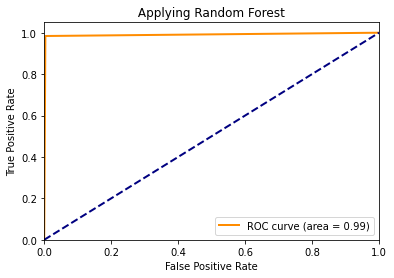

confusion matrix value for Random Forest is
True Negative: 285 False Negative: 1 True Positive: 62 False Positive: 1
--------------Accuracy----------------
Accuracy of Random Forest  is 99.43
--------------Sensitivity----------------
Sensitivity of Random Forest  is 98.41
--------------Specificity----------------
Specificity of Random Forest  is 99.65


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier(max_depth=2, random_state=0)




rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
#Confusion matrix is used to calculate the accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy=((confusion_matrix[0][0]+confusion_matrix[1][1])/len(y_test)*100)
print('\nAccuracy',accuracy,'\n')
print('Classfication Report\n',classification_report(y_test, y_pred))

createROCCurve(y_test,y_pred,' Applying Random Forest ')



conf_Mat= confusion_matrix
TN = conf_Mat[0][0]
FN = conf_Mat[1][0]
TP = conf_Mat[1][1]
FP = conf_Mat[0][1]

name="Random Forest"
    
print("confusion matrix value for", name,"is")
print("True Negative:",TN,"False Negative:",FN,"True Positive:",TP,"False Positive:",FP)
Accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    
print("--------------Accuracy----------------")
print("Accuracy of", name, " is",round(Accuracy,2))

Sensitivity=TP/(TP+FN)*100
print("--------------Sensitivity----------------")
print("Sensitivity of", name ," is" ,round(Sensitivity,2))

Specificity=TN/(TN+FP)*100
print("--------------Specificity----------------")
print("Specificity of",name," is",round(Specificity,2))

# Implementation of KNN

In [16]:
l=[5,10,15,25,40,50,100,200,500]
print('Value of K\t   Accuracy')
for i in l:
    X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size = .25)
    #K Neasrest Classifier with different 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    actual = y_test
    accuracy = (np.sum(predictions == actual)/len(actual))*100
    print(i,'\t\t',accuracy)


Value of K	   Accuracy
5 		 94.84240687679083
10 		 93.98280802292264
15 		 92.55014326647564
25 		 91.40401146131805
40 		 90.83094555873924
50 		 91.11747851002865
100 		 87.39255014326648
200 		 84.81375358166189
500 		 83.3810888252149


# k=5 would be best


Accuracy 97.134670487106 

Classfication Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       291
           1       0.94      0.88      0.91        58

    accuracy                           0.97       349
   macro avg       0.96      0.93      0.95       349
weighted avg       0.97      0.97      0.97       349



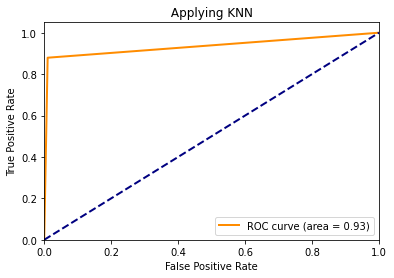

confusion matrix value for KNN is
True Negative: 288 False Negative: 7 True Positive: 51 False Positive: 3
--------------Accuracy----------------
Accuracy of KNN  is 97.13
--------------Sensitivity----------------
Sensitivity of KNN  is 87.93
--------------Specificity----------------
Specificity of KNN  is 98.97


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

#Confusion matrix is used to calculate the accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy=((confusion_matrix[0][0]+confusion_matrix[1][1])/len(y_test)*100)
print('\nAccuracy',accuracy,'\n')
print('Classfication Report\n',classification_report(y_test, y_pred))
createROCCurve(y_test,y_pred,' Applying KNN ')


conf_Mat= confusion_matrix
TN = conf_Mat[0][0]
FN = conf_Mat[1][0]
TP = conf_Mat[1][1]
FP = conf_Mat[0][1]

name="KNN"
    
print("confusion matrix value for", name,"is")
print("True Negative:",TN,"False Negative:",FN,"True Positive:",TP,"False Positive:",FP)
Accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    
print("--------------Accuracy----------------")
print("Accuracy of", name, " is",round(Accuracy,2))

Sensitivity=TP/(TP+FN)*100
print("--------------Sensitivity----------------")
print("Sensitivity of", name ," is" ,round(Sensitivity,2))

Specificity=TN/(TN+FP)*100
print("--------------Specificity----------------")
print("Specificity of",name," is",round(Specificity,2))

# Implementation of Logistic regression


Accuracy 99.14040114613181 

Classfication Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       291
           1       1.00      0.95      0.97        58

    accuracy                           0.99       349
   macro avg       0.99      0.97      0.98       349
weighted avg       0.99      0.99      0.99       349



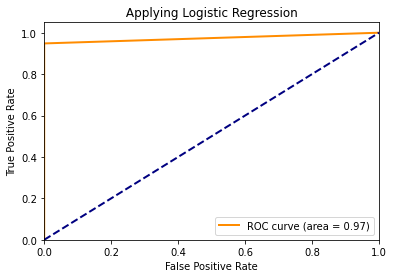

confusion matrix value for Logistic regression is
True Negative: 291 False Negative: 3 True Positive: 55 False Positive: 0
--------------Accuracy----------------
Accuracy of Logistic regression  is 99.14
--------------Sensitivity----------------
Sensitivity of Logistic regression  is 94.83
--------------Specificity----------------
Specificity of Logistic regression  is 100.0


In [18]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression is used for traning the model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
#Confusion matrix is used to calculate the accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy=((confusion_matrix[0][0]+confusion_matrix[1][1])/len(y_test)*100)
print('\nAccuracy',accuracy,'\n')
print('Classfication Report\n',classification_report(y_test, y_pred))

createROCCurve(y_test,y_pred,' Applying Logistic Regression ')


conf_Mat= confusion_matrix
TN = conf_Mat[0][0]
FN = conf_Mat[1][0]
TP = conf_Mat[1][1]
FP = conf_Mat[0][1]

name="Logistic regression"
    
print("confusion matrix value for", name,"is")
print("True Negative:",TN,"False Negative:",FN,"True Positive:",TP,"False Positive:",FP)
Accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    
print("--------------Accuracy----------------")
print("Accuracy of", name, " is",round(Accuracy,2))

Sensitivity=TP/(TP+FN)*100
print("--------------Sensitivity----------------")
print("Sensitivity of", name ," is" ,round(Sensitivity,2))

Specificity=TN/(TN+FP)*100
print("--------------Specificity----------------")
print("Specificity of",name," is",round(Specificity,2))


# Decision Tree Implementation


Accuracy 99.7134670487106 

Classfication Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       0.98      1.00      0.99        58

    accuracy                           1.00       349
   macro avg       0.99      1.00      0.99       349
weighted avg       1.00      1.00      1.00       349



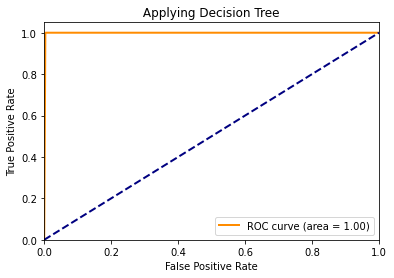

confusion matrix value for Decision Tree is
True Negative: 290 False Negative: 0 True Positive: 58 False Positive: 1
--------------Accuracy----------------
Accuracy of Decision Tree  is 99.71
--------------Sensitivity----------------
Sensitivity of Decision Tree  is 100.0
--------------Specificity----------------
Specificity of Decision Tree  is 99.66


In [19]:

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
#Confusion matrix is used to calculate the accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy=((confusion_matrix[0][0]+confusion_matrix[1][1])/len(y_test)*100)
print('\nAccuracy',accuracy,'\n')
print('Classfication Report\n',classification_report(y_test, y_pred))

createROCCurve(y_test,y_pred,' Applying Decision Tree ')



conf_Mat= confusion_matrix
TN = conf_Mat[0][0]
FN = conf_Mat[1][0]
TP = conf_Mat[1][1]
FP = conf_Mat[0][1]

name="Decision Tree"
    
print("confusion matrix value for", name,"is")
print("True Negative:",TN,"False Negative:",FN,"True Positive:",TP,"False Positive:",FP)
Accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    
print("--------------Accuracy----------------")
print("Accuracy of", name, " is",round(Accuracy,2))

Sensitivity=TP/(TP+FN)*100
print("--------------Sensitivity----------------")
print("Sensitivity of", name ," is" ,round(Sensitivity,2))

Specificity=TN/(TN+FP)*100
print("--------------Specificity----------------")
print("Specificity of",name," is",round(Specificity,2))

# Customized Input 

In [20]:
sample_input1=[['15','0.003836','0.000008','0.000122','20','1524','83','3','22','31.414335','0.000071','6291.827739']]

In [21]:
print("Predicted Output for Naive Bayes algorithm")
customized_output_NV = nv.predict(sample_input1)
print(customized_output_NV)
print("Predicted Output for SVM algorithm")
customized_output_SVM = s_v_m.predict(sample_input1)
print(customized_output_SVM)
print("Predicted Output for Random FOrest algorithm")
customized_output_rf = rf.predict(sample_input1)
print(customized_output_rf)
print("Predicted Output for KNN N=5 algorithm")
customized_output_knn = knn.predict(sample_input1)
print(customized_output_knn)
print("Predicted Output for Logistic Regression algorithm")
customized_output_LogReg = LogReg.predict(sample_input1)
print(customized_output_LogReg)
print("Predicted Output for Decision Tree algorithm")
customized_output_DT = dt.predict(sample_input1)
print(customized_output_DT)

Predicted Output for Naive Bayes algorithm
[1]
Predicted Output for SVM algorithm
[0]
Predicted Output for Random FOrest algorithm
[1]
Predicted Output for KNN N=5 algorithm
[1]
Predicted Output for Logistic Regression algorithm
[1]
Predicted Output for Decision Tree algorithm
[1]
